<a href="https://colab.research.google.com/github/notSoumya/Network-Routing-Optimizer/blob/main/visualisation/network_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

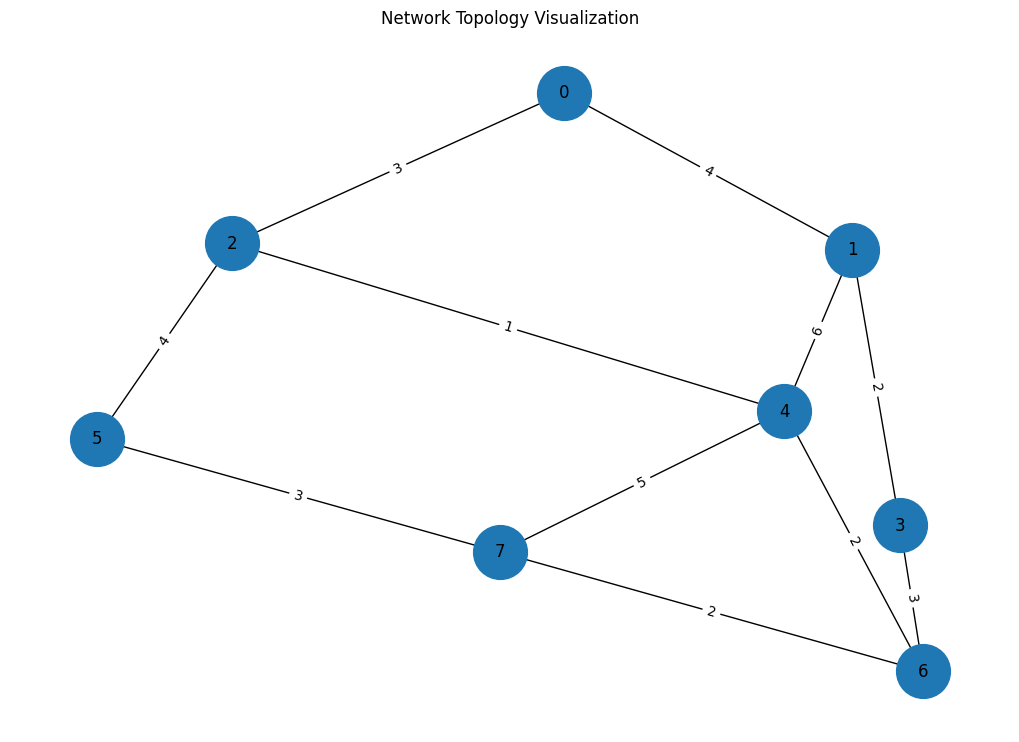

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Load edges from the file you uploaded
file_path = "/content/network.txt"   # Colab path

G = nx.Graph()

# Read file data
with open(file_path, "r") as f:
    for line in f:
        u, v, w = map(int, line.split())
        G.add_edge(u, v, weight=w)

# Draw graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)   # for consistent layout

# Draw nodes & edges
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=12)

# Draw edge labels (weights)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Network Topology Visualization")
plt.show()


Enter start node: 0
Enter end node: 7


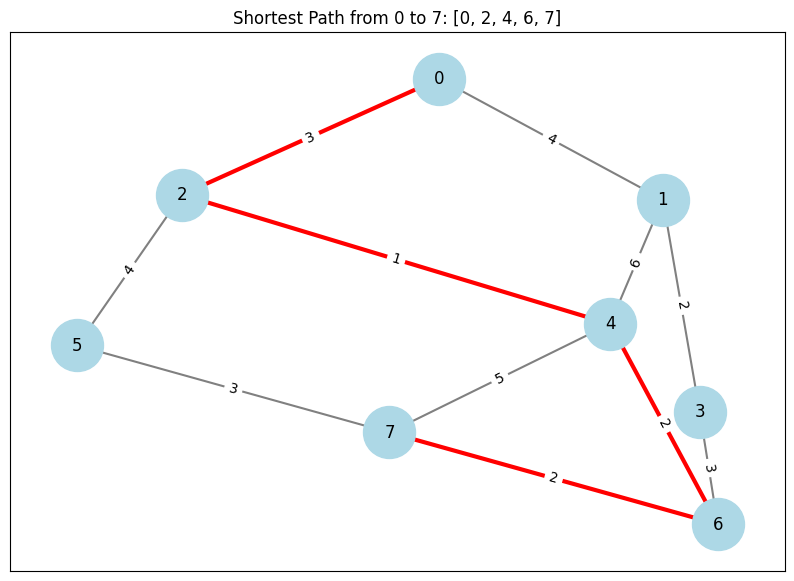

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Load graph from file
file_path = "/content/network.txt"   # uploaded file
G = nx.Graph()

with open(file_path, "r") as f:
    for line in f:
        u, v, w = map(int, line.split())
        G.add_edge(u, v, weight=w)

# Function to visualize shortest path
def visualize_shortest_path(G, start, end):
    # ---- Run Dijkstra shortest path ----
    try:
        path = nx.shortest_path(G, source=start, target=end, weight="weight")
    except nx.NetworkXNoPath:
        print("No path exists between nodes.")
        return

    # Get layout positions
    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(10, 7))

    # ---- Draw all nodes ----
    nx.draw_networkx_nodes(G, pos, node_size=1400, node_color="lightblue")
    nx.draw_networkx_labels(G, pos, font_size=12)

    # ---- Draw all edges in light gray ----
    nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray")

    # ---- Extract path edges ----
    path_edges = list(zip(path, path[1:]))

    # ---- Draw shortest path edges in red ----
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=3, edge_color="red")

    # ---- Show edge weights ----
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"Shortest Path from {start} to {end}: {path}")
    plt.show()

# Ask user input (works in Colab)
start = int(input("Enter start node: "))
end = int(input("Enter end node: "))

visualize_shortest_path(G, start, end)


In [1]:
!pip install networkx matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()


Saving network.txt to network (1).txt


In [3]:
import networkx as nx

def load_graph(filename):
    G = nx.Graph()
    with open(filename, 'r') as f:
        for line in f:
            if len(line.split()) != 3:
                continue
            u, v, w = map(int, line.split())
            G.add_edge(u, v, weight=w)
    return G

G = load_graph("network.txt")
print("Graph loaded successfully!")


Graph loaded successfully!


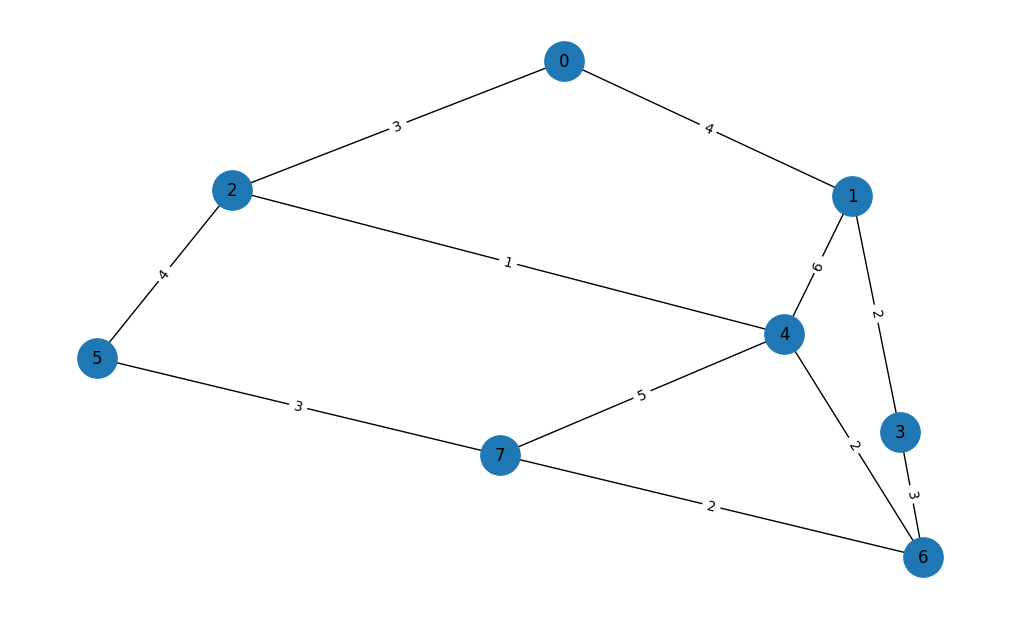

In [4]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_size=800)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'))
plt.show()


In [6]:
def show_shortest_path(G, start, end):
    try:
        path = nx.dijkstra_path(G, start, end, weight='weight')
        length = nx.dijkstra_path_length(G, start, end, weight='weight')

        print("Shortest path:", path)
        print("Total weight:", length)

        plt.figure(figsize=(10, 6))
        nx.draw(G, pos, with_labels=True, node_size=800, alpha=0.3)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G,'weight'))

        path_edges = list(zip(path, path[1:]))

        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="yellow", node_size=900)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, width=4, edge_color="red")

        plt.show()
    except:
        print("No path exists!")


Shortest path: [0, 2, 4, 6, 7]
Total weight: 8


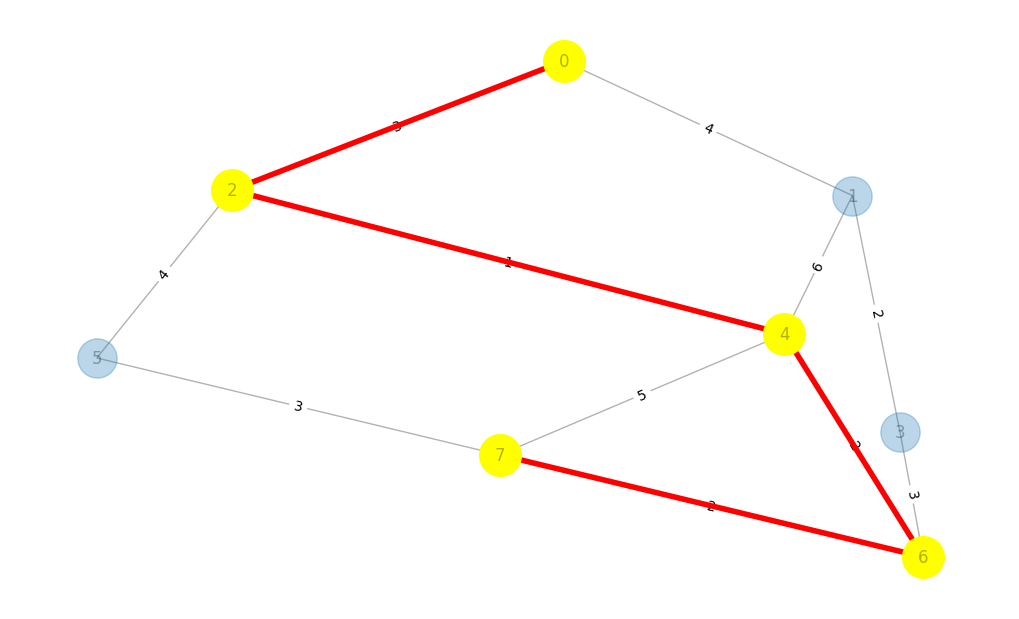

In [7]:
show_shortest_path(G, 0, 7)


In [8]:
def block_node(G, node):
    if node in G:
        G.remove_node(node)
        print("Node", node, "blocked!")

def reload_graph():
    return load_graph("network.txt")


Node 4 blocked!
Shortest path: [0, 2, 5, 7]
Total weight: 10


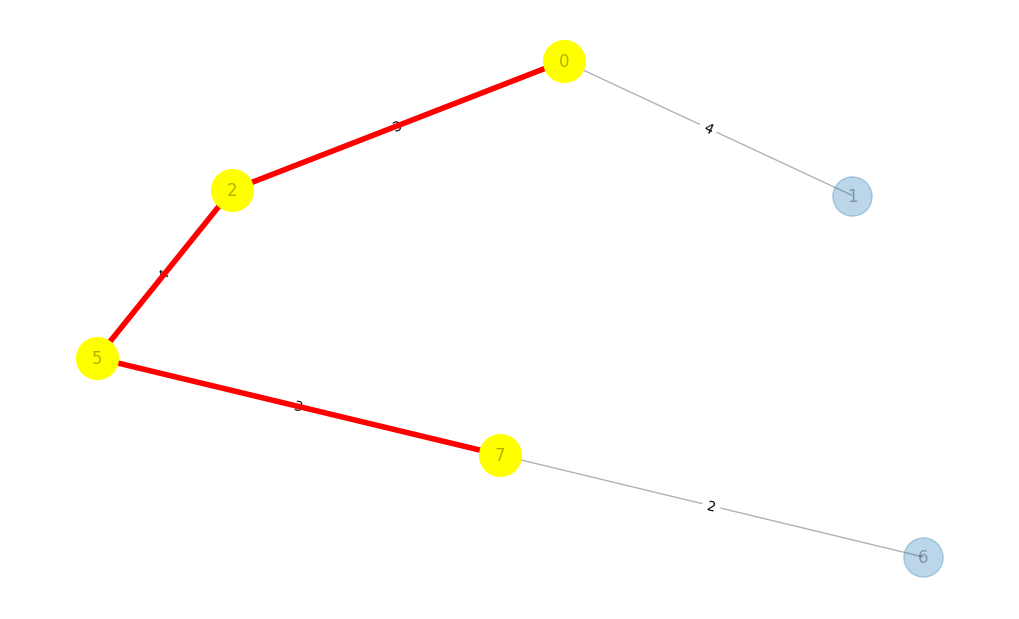

In [10]:
block_node(G, 4)
show_shortest_path(G, 0, 7)
